In [3]:
#importing module spotipy to make api calls to spotify
import spotipy
# module to extract song from url
import urllib
# OAuth Credenials
from spotipy.oauth2 import SpotifyClientCredentials
from multiprocessing import Process, Queue
import pandas as pd 
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

client_credentials_manager = SpotifyClientCredentials(client_id='4a1a457d14c0445a96e7021a5523905b', client_secret='45b186d601544fdcbb4fe07c7b23cce5')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [4]:
# tracks_total contains audio tracks for 14887 songs
import glob, os
os.chdir("/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/tracks_total")
track_ids  = []
for file in glob.glob("*.wav"):
    track_ids.append(file[5:-4])



In [5]:
len(track_ids)
print(track_ids[:15])

['002iHpz1z9UbrIzJ8xcx3M', '003z7jJLt6uHFL7MXNoiFG', '00BEfnRBx4462R8DEqIht2', '00BuKLSAFkaEkaVAgIMbeA', '00cbPJvsvWKM7v2XJ7iUSz', '00cP99zN0bsUZSpXbAlQXg', '00fbABFSx3C0IGbBZwZ6my', '00FhepGny3cj4PuxZHRRGz', '00Hxf3pBkAasP9itOoAtWv', '00jlyC6x233qlS1vhLHdA3', '00k4IcdhoUtt3fBATrDyhh', '00kzys67XYXiB31cSP5jfo', '00Lv5XnSWvhYx89KkuiYPe', '00myZYBi2sZMbd8IikZgQh', '00OzUEgsPIqPK1LGaQBHMk']


In [4]:
# get the populrity of track given track id
def get_popularity(offset, numLoops, queue, track_ids, limit=10):
    # store all tracks of all playlists 
    print('Starting')
    track_ids_all= []
    popularity = []
    preview_urls_all =[]
    for loopIndex in range(numLoops):
        start = offset + limit*loopIndex
        end = start +50
        tracks_list = sp.tracks(track_ids[start:end])
        
        
        for track in tracks_list['tracks']:
            
            try:
                preview_urls_all.append(track['preview_url'])
                track_ids_all.append(track['id'])
                popularity.append(track['popularity'])
            except:
            #    a=0
                print("NO METADATA")
        

    track_data = pd.DataFrame({
    'preview_url': preview_urls_all,
    'id': track_ids_all,
    'popularity': popularity        
    
   
    })
    q.put(track_data)
    track_data.to_csv("all_tracks_data.csv")


    #name = multiprocessing.current_process().name
    print('Exiting')


In [5]:
if __name__ == '__main__':
    q = Queue()
    for offset in [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000,14500]:
        Process(target=get_popularity, args=(offset,10,q, track_ids)).start()
    #p.start()
    #print(q.get())    # prints "[42, None, 'hello']"
    #p.join()

Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
Starting
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...7secs
retrying ...5secs
retrying ...5secs
retrying ...0secs
retrying ...0secs
retrying ...0secs
retrying ...0secs
retrying ...0secs
retrying ...0secs
retrying ...0secs
retrying ...0secs
retrying ...0secs
retrying ...7secs
retrying .

In [6]:
# combining  data  from different processes into 1 frame
all_dfs = []
for _ in range(30):
    all_dfs.append(q.get())

In [7]:
playlist_data = all_dfs[0]
for each in all_dfs[1:]:
    playlist_data = playlist_data.append(each,ignore_index=True)

In [11]:
# saving data into csv
playlist_data.to_csv("all_tracks_data.csv")

In [5]:
# reading data from csv
import glob, os
os.chdir("/Users/sonumehta/Desktop/Sem2/Capstone/PyAudio_tools/pyAudioAnalysis/tracks_total")

data_frame1 = pd.read_csv('all_tracks_data.csv')
data_frame1.head()


,Unnamed: 0,id,popularity,preview_url
0,0,5bF6crgJa5Q58IWgbdUbuO,48,https://p.scdn.co/mp3-preview/8ca5cd7ee7279899...
1,1,5BFMUpscSbYVT2V9j5d275,46,https://p.scdn.co/mp3-preview/0c6334f2acda0ab8...
2,2,5bFxSkRAr1kiESBIkArOiP,24,https://p.scdn.co/mp3-preview/8beed2be330e16ce...
3,3,5bG5GUKVJztKR5nff1CwUp,31,https://p.scdn.co/mp3-preview/7d082bccb3e53698...
4,4,5BgC5vVuhfWHHawbcXRr7h,31,https://p.scdn.co/mp3-preview/2984ca0f925048f2...


In [12]:
# extracting  features at each timestamp and taking the mean  
features = []
track_final = []
popularity_final = []
for i in range(data_frame1['id'].shape[0]):
    id1  =data_frame1['id'].iloc[i]
    name = "track"+ id1+".wav_st.csv"

    a  = pd.read_csv(name, header = None)
    if (np.ravel(a).shape[0]) == 1020:
        
        #b = np.ravel(np.reshape(np.ravel(a), (1020,1)))
        b = np.mean(a, axis = 0)

        features.append(b)
        track_final.append(id1)
        popularity_final.append(data_frame1['popularity'].iloc[i])
features = np.array(features)

In [ ]:
# saving all data into a csv
features.shape
import pandas as pd 
df = pd.DataFrame(features)
df.to_csv("mean_features.csv")
df = pd.DataFrame(popularity_final)
df.to_csv("mean_popularity.csv")



In [6]:
# reading data back from csv
popularity = pd.read_csv('mean_popularity.csv', header= None)
features = pd.read_csv('mean_features.csv', header=None)
popularity = np.array(popularity)
popularity[1:,1].shape
features = np.array(features)
features[1:,1:].shape
y = popularity[1:,1]
X = features[1:,1:]


In [7]:
# size of popularity
popularity = np.array(popularity)
popularity[1:,1].shape

(14887,)

In [8]:
# dimension of features
features = np.array(features)
features[1:,1:].shape

(14887, 34)

In [9]:
# response and predictors for track popularity prediction
y = popularity[1:,1]
X = features[1:,1:]
popularity = y

In [10]:
# function to calculate R2
def R2(ytrue, ypred):
    sse = np.array([i*i for i in (ytrue-ypred)])
    #print(sse.shape)
    sse = np.sum(sse)
    diff_val = (ytrue-np.mean(ytrue))
    #print(diff_val.shape)
    tss = np.array([i*i for i in diff_val])
    tss = np.sum(tss)
    print(sse, tss)
    res = 1-sse/tss
    return res



In [11]:
# diving response variable into 4 bins
y_new = popularity.copy()
y_new[popularity <= 25 ] = 1
y_new[(popularity > 25) &  (popularity <= 50) ] = 2
y_new[(popularity > 50) &  (popularity <= 75) ] = 3
y_new[(popularity > 75)] = 4


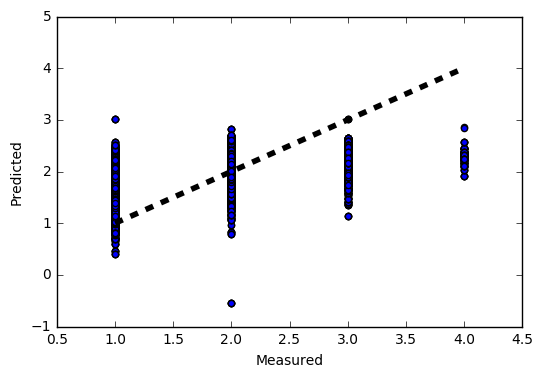

(6188.6824079455819, 7973.4611405924643)
('R2 :', 0.22383989853047248)


In [12]:
# cross-validation linear regression ##

lr = linear_model.LinearRegression()

y = y_new

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print("R2 :", R2(y, predicted))

In [13]:
# Ridge regression
reg = linear_model.Ridge(alpha = .5)
predicted = cross_val_predict(reg, X, y, cv=10)
print("R2 :", R2(y, predicted))
# fig, ax = plt.subplots()
# ax.scatter(y, predicted)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()

(6200.2653644686843, 7973.4611405924643)
('R2 :', 0.22238720987759442)


In [ ]:
# Support vector regression 
# takes too long to run
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=1e3)
predicted = cross_val_predict(svr_lin, X, y, cv=10)
metrics.accuracy_score(y, predicted) 

In [14]:
# random forest regressor

rng = np.random.RandomState(0)

print("Strting")
# Estimate the score on the entire dataset, with no missing values
estimator = RandomForestRegressor(random_state=0, n_estimators=34)
score = cross_val_score(estimator, X, y).mean()
print("Score with the entire dataset = %.2f" % score)

Strting
Score with the entire dataset = 0.24


In [15]:
# df = pd.DataFrame(X)
# coerr = df.corr()
# # import seaborn as sns
# # sns.heatmap(df)

In [16]:
# Random forest regressor with sample weights
rng = np.random.RandomState(0)

print("Strting")
weights = dict()
weights[1] = 1
weights[2] = 1
weights[3] = 10
weights[4] = 1
# Estimate the score on the entire dataset, with no missing values
estimator = RandomForestClassifier(random_state=0, n_estimators=34, class_weight=weights)
#estimator = RandomForestClassifier(random_state=0, n_estimators=34)
score = cross_val_score(estimator, X, y_new).mean()
print("Score with the entire dataset = %.2f" % score)

Strting
Score with the entire dataset = 0.58


In [17]:
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(estimator, X, y_new, cv = 5)

confusion_matrix(y_new, y_pred)

array([[1853, 1993,  162,    0],
       [ 588, 6100,  633,    0],
       [  88, 2523,  809,    0],
       [   0,   90,   37,   11]])

In [18]:
# dividing response variable into 6 bins
y_new = popularity.copy()
y_new[popularity <= 10 ] = 1
y_new[(popularity > 10) &  (popularity <= 20) ] = 1
y_new[(popularity > 20) &  (popularity <= 30) ] = 1
y_new[(popularity > 30) &  (popularity <= 40) ] = 1
y_new[(popularity > 40) &  (popularity <= 50) ] = 1
y_new[(popularity > 50) &  (popularity <= 60) ] = 6
y_new[(popularity > 60) &  (popularity <= 70) ] = 7
y_new[(popularity > 70) &  (popularity <= 80) ] = 8
y_new[(popularity > 80) &  (popularity <= 90) ] = 9


y_new[(popularity > 90)] = 10


The following the best model with accuracy 76% and precision = 1, sensitivity = 1 for high popularity class

In [19]:
# Random forest regressor with sample weights
# best model  with the given values
# ran this model with differnet sample weights and n_estimators, the best value is with the given set of parameters

rng = np.random.RandomState(0)

print("Strting")
weights = dict()
weights[1] = 1
weights[6] = 1
weights[7] = 1
weights[8] = 10
weights[9] = 10
weights[10] = 1
# Estimate the score on the entire dataset, with no missing values
estimator = RandomForestClassifier(random_state=0, n_estimators=34, class_weight=weights)
#estimator = RandomForestClassifier(random_state=0, n_estimators=10)
score = cross_val_score(estimator, X, y_new).mean()
print("Score with the entire dataset = %.2f" % score)

Strting
Score with the entire dataset = 0.76


In [21]:
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(estimator, X, y_new, cv = 5)

C = confusion_matrix(y_new, y_pred)
print(C)

[[11232    91     2     4     0     0]
 [ 2147    52    12     0     0     0]
 [  948    19    36     3     0     0]
 [  241     4     4    43     0     0]
 [   30     0     0     0    14     0]
 [    0     0     0     0     0     5]]


In [20]:
model  = RandomForestClassifier.fit(estimator,X, y_new)
a=model.feature_importances_


In [37]:
# rinting the ids of features based on their importance. The most important feature is id 1 which is energy.
#More details can be found on pyaudio analysis website
b = np.argsort(a)
print(b)
a

[ 5 23  3  0 25  7 14 24  9 22 16 32 27  6 31 30 11 26 21 10 20 15 19 13 29
 18 33 17 28 12  4  2  8  1]


array([ 0.02182815,  0.0666794 ,  0.04629009,  0.02176988,  0.04271895,
        0.01963187,  0.0260812 ,  0.02227552,  0.04908586,  0.02393441,
        0.02714524,  0.02646295,  0.03522998,  0.02975027,  0.02331791,
        0.02793604,  0.02451426,  0.03369906,  0.0301474 ,  0.02850781,
        0.02740565,  0.02684943,  0.02421134,  0.02138641,  0.0234785 ,
        0.02219989,  0.02658709,  0.0253327 ,  0.03482936,  0.02991624,
        0.0262058 ,  0.02619435,  0.02515505,  0.03324194])

In [43]:
# diviion into 3 classes
y_new = popularity.copy()
y_new[popularity <= 10 ] = 1
y_new[(popularity > 10) &  (popularity <= 20) ] = 1
y_new[(popularity > 20) &  (popularity <= 30) ] = 1
y_new[(popularity > 30) &  (popularity <= 40) ] = 1
y_new[(popularity > 40) &  (popularity <= 50) ] = 1
y_new[(popularity > 50) &  (popularity <= 60) ] = 2
y_new[(popularity > 60) &  (popularity <= 70) ] = 2
y_new[(popularity > 70) &  (popularity <= 80) ] = 2
y_new[(popularity > 80) &  (popularity <= 90) ] = 3


y_new[(popularity > 90)] = 3

import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)

print("Strting")
weights = dict()
weights[1] = 10
weights[2] = 10
weights[3] = 1
# Estimate the score on the entire dataset, with no missing values
estimator = RandomForestClassifier(random_state=0, n_estimators=34, class_weight=weights)
#estimator = RandomForestClassifier(random_state=0, n_estimators=10)
score = cross_val_score(estimator, X, y_new).mean()
print("Score with the entire dataset = %.2f" % score)

Strting
Score with the entire dataset = 0.77


In [44]:
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(estimator, X, y_new, cv = 5)

C = confusion_matrix(y_new, y_pred)
print(C)

[[10900   429     0]
 [ 2994   515     0]
 [   24     6    19]]
